In [73]:
import torch
from os.path import expanduser
from torch.utils.data import DataLoader

from data import get_dataset
from model import VAE

train_dataset, test_dataset, mask = get_dataset(in_memory=True)

train_loader = DataLoader(train_dataset, batch_size=32,
                          shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32,
                         shuffle=False)

device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

model = VAE()
name = 'vae_e_11_loss_4.0705e+03.pkl'
model.load_state_dict(torch.load(expanduser('~/output/deep-fmri/%s' % name)))

model = model.to(device)
mask = mask.to(device)
data = test_dataset[0][None, ...]
data = data.to(device)
recs = []
with torch.no_grad():
    for this_data in test_loader:
        this_data = this_data.to(device)
        rec, penalty = model(this_data)
        recs.append(rec)
recs_ = torch.cat(recs, dim=0)
recs_.masked_fill_(mask[None, None, ...] ^ 1, 0.)
data_ = torch.cat([this_data for this_data in test_loader])

In [74]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [75]:
data = data_.clone()
recs = recs_.clone()

In [76]:
data = data.to('cpu').numpy()
recs = recs.to('cpu').numpy()

In [77]:
data_c = data - data.mean(axis=0, keepdims=True)
std_data = data.std(axis=0, keepdims=True)
std_data[std_data == 0] = 0.000000000001
data_c /= std_data
recs_c = recs - recs.mean(axis=0, keepdims=True)
std_recs = recs.std(axis=0, keepdims=True)
std_recs[std_recs == 0] = 0.000000000001
recs_c /= std_recs
std_recs = std_recs[0, 0, :, :, :]
std_data = std_data[0, 0, :, :, :]

(37, 83, 63)


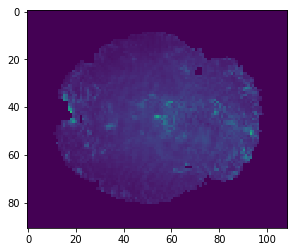

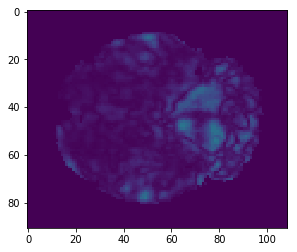

In [78]:
fig = plt.figure()
vmax = std_data.max()
amax = np.unravel_index(np.argmax(std_data), std_recs.shape)
print(amax)
plt.imshow(std_data[:, :, 28], vmax=vmax)
fig = plt.figure()
plt.imshow(std_recs[:, :, 28], vmax=vmax)    

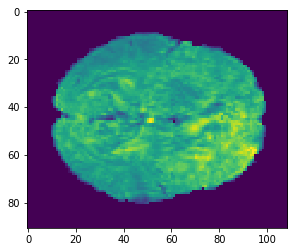

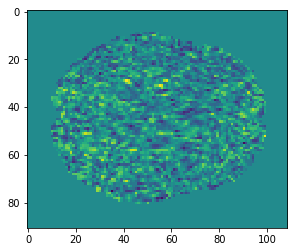

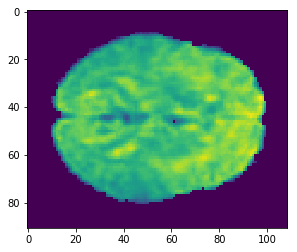

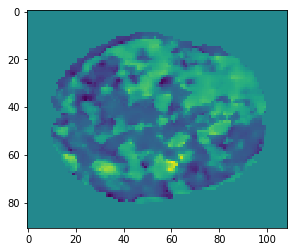

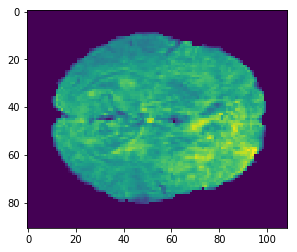

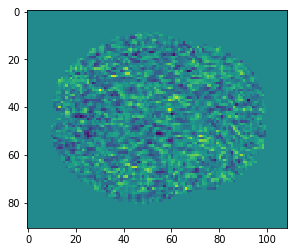

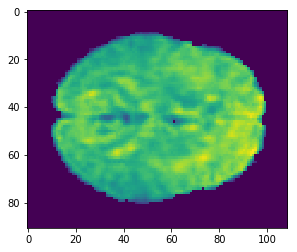

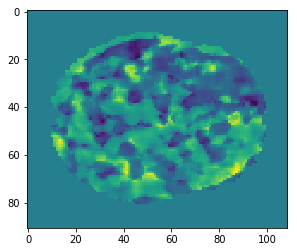

In [79]:
for j in [10, 250]:
    i = 40
    fig = plt.figure()
    plt.imshow(data[j, 0, :, :, i])
    fig = plt.figure()
    plt.imshow(data_c[j, 0, :, :, i])
    fig = plt.figure()
    plt.imshow(recs[j, 0, :, :, i])
    fig = plt.figure()
    plt.imshow(recs_c[j, 0, :, :, i])
